<a href="https://colab.research.google.com/github/ya-stack/YOLOv4/blob/master/YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!nvidia-smi

Wed Sep 15 12:43:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Rotation Correction**

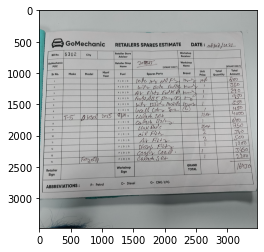

In [ ]:
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat
osd = pytesseract.image_to_osd('/content/sample_data/try2.jpg')
img = cv2.imread('/content/sample_data/try2.jpg')    
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
if (angle!= 90):
  img = rotate_image(img, 90)
  plt.imshow(img)
else:
  plt.imshow(img)


## **YOLOv5**

In [5]:
!unzip /content/drive/MyDrive/Retrain_YOLO.zip -d /content/yolov5/Data

Archive:  /content/drive/MyDrive/Retrain_YOLO.zip
   creating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/
   creating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/1.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/10.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/14.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/15.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/1630987702579.jpg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/1630987702606.jpg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/17.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/4.jpeg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/4thSep_1630746961025.jpg  
  inflating: /content/yolov5/Data/Retrain_YOLO/test_YOLO/images/4thSep_1630746961083.jpg  
  inflating: /content/yolov5/Data/R

In [4]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 9315, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9315 (delta 1), reused 0 (delta 0), pack-reused 9309
Receiving objects: 100% (9315/9315), 9.75 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (6472/6472), done.


In [4]:
%cd /content/yolov5

/content/yolov5


In [8]:
!pip install -r /content/yolov5/requirements.txt

     |████████████████████████████████| 3.0 MB 4.2 MB/s 
     |████████████████████████████████| 636 kB 39.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# !/content/drive/MyDrive/yolov5-master/yolov5-master/data/scripts/download_weights.sh

/bin/bash: /content/drive/MyDrive/yolov5-master/yolov5-master/data/scripts/download_weights.sh: /bin/bash: bad interpreter: Permission denied


In [ ]:
# !/content/yolov5/data/scripts/download_weights.sh

In [ ]:
!unzip /content/drive/MyDrive/71_Images.zip -d /content/sample_data

Archive:  /content/drive/MyDrive/71_Images.zip
   creating: /content/sample_data/71_Images/test/
   creating: /content/sample_data/71_Images/test/images/
  inflating: /content/sample_data/71_Images/test/images/1.jpeg  
  inflating: /content/sample_data/71_Images/test/images/12.jpeg  
  inflating: /content/sample_data/71_Images/test/images/2.jpeg  
  inflating: /content/sample_data/71_Images/test/images/3.jpeg  
  inflating: /content/sample_data/71_Images/test/images/4.jpeg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_121326.jpg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_121438.jpg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_121714.jpg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_122055.jpg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_122212.jpg  
  inflating: /content/sample_data/71_Images/test/images/IMG_20210820_122413.jpg  
  inflating: /content/sample

In [6]:
while True:
  pass

KeyboardInterrupt: ignored

## **TRAINING**

In [ ]:
!python /content/yolov5/train.py --batch 16 --epochs 400 --data /content/yolov5/data/coco128.yaml --weights /content/drive/MyDrive/yolov5m.pt

100% 755k/755k [00:00<00:00, 14.6MB/s]
train: weights=/content/drive/MyDrive/yolov5m.pt, cfg=, data=/content/yolov5/data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=400, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-433-g621b6d5 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [ ]:
while True:
  pass

## **RETRAINING**

In [ ]:
!python /content/drive/MyDrive/yolov5-master/yolov5-master/train.py --weights /content/drive/MyDrive/yolov5-master/yolov5-master/runs/train/exp/weights/last.pt --epochs 500 

train: weights=/content/drive/MyDrive/yolov5-master/yolov5-master/runs/train/exp/weights/last.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2021-8-27 torch 1.9.0+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [ ]:
while True:
  pass

KeyboardInterrupt: ignored

In [ ]:
!unrar x /content/drive/MyDrive/7thSep2021.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/7thSep2021.rar

Creating    7thSep2021                                                OK
Extracting  7thSep2021/1630987702579.jpg                                   0%  1%  2%  3%  4%  5%  6%  7%  OK 
Extracting  7thSep2021/1630987702593.jpg                                   7%  8%  9% 10% 11% 12% 13% 14% 15%  OK 
Extracting  7thSep2021/1630987702606.jpg                                  15% 16% 17% 18% 19% 20% 21% 22%  OK 
Extracting  7thSep2021/1630987702620.jpg                                  23% 24% 25% 26% 27% 28% 29% 30%  OK 
Extracting  7thSep2021/1630987717917.jpg                                  35%  OK 
Extracting  7thSep2021/1630987717933.jpg                                  35% 36% 37% 38% 3

In [ ]:
while True:
  pass

KeyboardInterrupt: ignored

In [ ]:
!unzip /content/drive/MyDrive/detect_exp.zip

Archive:  /content/drive/MyDrive/detect_exp.zip
   creating: content/runs/detect/exp/
  inflating: content/runs/detect/exp/IMG_20210820_122738.jpg  
  inflating: content/runs/detect/exp/IMG_20210820_121438.jpg  
  inflating: content/runs/detect/exp/IMG_20210820_122055.jpg  
  inflating: content/runs/detect/exp/IMG_20210820_122212.jpg  
  inflating: content/runs/detect/exp/12.jpeg  
  inflating: content/runs/detect/exp/IMG_20210820_121326.jpg  
  inflating: content/runs/detect/exp/IMG_20210820_122542.jpg  
  inflating: content/runs/detect/exp/IMG_20210820_121714.jpg  
  inflating: content/runs/detect/exp/3.jpeg  
  inflating: content/runs/detect/exp/4.jpeg  
   creating: content/runs/detect/exp/crops/
   creating: content/runs/detect/exp/crops/Grand_Total/
  inflating: content/runs/detect/exp/crops/Grand_Total/1.jpg  
  inflating: content/runs/detect/exp/crops/Grand_Total/12.jpg  
  inflating: content/runs/detect/exp/crops/Grand_Total/IMG_20210820_1227192.jpg  
  inflating: content/runs

## **DETECTION**

In [ ]:
!unrar x /content/yolov5/15thSept2021.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/yolov5/15thSept2021.rar

Creating    15thSept2021                                              OK
Extracting  15thSept2021/IMG-3542.jpg                                      7%  OK 
Extracting  15thSept2021/IMG-3543.jpg                                     14%  OK 
Extracting  15thSept2021/IMG-3544.jpg                                     22%  OK 
Extracting  15thSept2021/IMG-3545.jpg                                     30%  OK 
Extracting  15thSept2021/IMG-3546.jpg                                     38%  OK 
Extracting  15thSept2021/IMG-3547.jpg                                     45%  OK 
Extracting  15thSept2021/IMG-3548.jpg                                     53%  OK 
Extracting  15thSept2021/IMG-3549.jpg                                     61%  OK 
Extracting  15thSept2021/IMG-3550.jpg                                   

In [ ]:
!python /content/yolov5/detect.py --source /content/yolov5/15thSept2021 --weights /content/drive/MyDrive/best_333.pt  --save-txt --save-conf --save-crop --conf-thres 0.25

detect: weights=['/content/drive/MyDrive/best_333.pt'], source=/content/yolov5/15thSept2021, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-431-gfcb225c torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPs
image 1/31 /content/yolov5/15thSept2021/IMG-3542.jpg: 480x640 6 Amounts, 1 Date, 1 Bill_No, Done. (0.028s)
image 2/31 /content/yolov5/15thSept2021/IMG-3543.jpg: 480x640 4 Amounts, 1 Date, 2 Bill_Nos, Done. (0.027s)
image 3/31 /content/yolov5/15thSept2021/IMG-3544.jpg: 480x640 18 Amounts, 1 Date, 1 Bill_No, Done. (0.027s)
image 4/31 /content/yolov5/15thSept2021/IMG-3545.jpg: 480x640 2 Amounts,

In [ ]:
# from google.colab.patches import cv2_imshow

In [ ]:
filename = "/content/yolov5/runs/detect/exp8" #@param {type:"string"}
folders_or_files_to_save = "/content/yolov5/runs/detect/exp8" #@param {type:"string"}
from google.colab import files
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

def save_file_to_drive(name, path):
    file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
    }

    media = MediaFileUpload(path, 
                  mimetype='application/octet-stream',
                  resumable=True)

    created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created


extension_zip = ".zip"

zip_file = filename + extension_zip

# !rm -rf $zip_file
!zip -r $zip_file {folders_or_files_to_save} # FOLDERS TO SAVE INTO ZIP FILE

auth.authenticate_user()
drive_service = build('drive', 'v3')

destination_name = zip_file
path_to_file = zip_file
save_file_to_drive(destination_name, path_to_file)

  adding: content/yolov5/runs/detect/exp8/ (stored 0%)
  adding: content/yolov5/runs/detect/exp8/1630987702606.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp8/1630987717947.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp8/1630987733752.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp8/4thSep_1630746961025.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp8/4thSep_1630746961083.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp8/labels/ (stored 0%)
  adding: content/yolov5/runs/detect/exp8/labels/1630987717959.txt (deflated 61%)
  adding: content/yolov5/runs/detect/exp8/labels/4thSep_1630746961083.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp8/labels/1630987702579.txt (deflated 56%)
  adding: content/yolov5/runs/detect/exp8/labels/1630987717933.txt (deflated 58%)
  adding: content/yolov5/runs/detect/exp8/labels/1630987717947.txt (deflated 57%)
  adding: content/yolov5/runs/detect/exp8/labels/4thSep_1630746961001.txt (deflate

{'id': '16IlnP3JygnKuofvYqJt4FITzUsikwn50'}

Retraining

In [ ]:
!python /content/yolov5/train.py --weights /content/runs/train/exp2/weights/last.pt --epochs 100

train: weights=/content/runs/train/exp2/weights/last.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=30
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v5.0-405-gfad57c2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

In [ ]:
while True:
  pass

KeyboardInterrupt: ignored

In [ ]:
import yolov5

# load model
model = yolov5.load('/content/drive/MyDrive/yolov5-master/yolov5-master/yolov5s.pt')

# set image
img = 'content/drive/MyDrive/yolov5-master/yolov5-master/train/images/test.jpeg/'

# perform inference
results = model(img)

# inference with larger input size
results = model(img, size=1280)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, x2, y1, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')

Saved test.jpg to results


In [ ]:
!python /content/yolov5/detect.py --source /content/yolov5/71_Images/test/images --weights /content/runs/train/exp2/weights/best.pt  --save-txt --save-conf --save-crop

detect: weights=['/content/runs/train/exp2/weights/best.pt'], source=/content/yolov5/71_Images/test/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-405-gfad57c2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 308 layers, 21049761 parameters, 0 gradients, 50.3 GFLOPs
image 1/14 /content/yolov5/71_Images/test/images/1.jpeg: 480x640 1 Date, 1 Bill_No, 2 Grand_Totals, Done. (0.070s)
image 2/14 /content/yolov5/71_Images/test/images/12.jpeg: 480x640 1 Bill_No, 1 Grand_Total, Done. (0.069s)
image 3/14 /content/yolov5/71_Images/test/images/2.jpeg: 480x640 7 Amounts, 3 Dates, 1 Bill_

In [ ]:
import torch

In [ ]:
!pip install pyyaml

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5-master/best_.pt')  # default

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-8-24 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
results = model('/content/drive/MyDrive/yolov5-master/yolov5-master/train/images/test.jpeg')

In [ ]:
results.print()  
results.save()

image 1/1: 720x1280 1 Amount, 1 Grand_Total, 1 Date, 1 Bill_No
Speed: 26.1ms pre-process, 9.7ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to 'runs/detect/exp'


Text Recognition

In [ ]:
from google.colab.patches import cv2_imshow

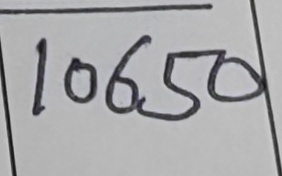

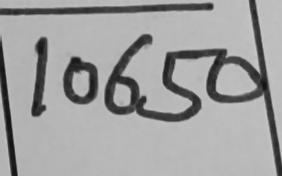

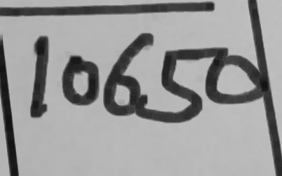

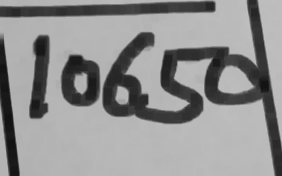

In [ ]:
# load the image, convert it to grayscale, and display it to our
# screen
image = cv2.imread("/content/drive/MyDrive/yolov5-master/yolov5-master/runs/detect/exp/crops/Grand_Total/IMG_20210820_122212.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( image)
# apply a series of erosions
for i in range(0, 3):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
	cv2_imshow(eroded)
	cv2.waitKey(0)
 

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=48d13b9f972bb1144a11198193563811b5d512132e6b018b399079db5dbaae47
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,752 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract

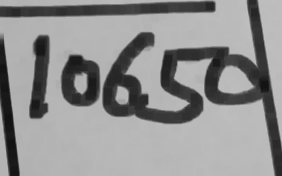

-1

In [ ]:
cv2_imshow(eroded)
cv2.waitKey(0)

In [ ]:
!git clone https://github.com/filippoguerranti/handwritten_long_numbers_recognition.git

Cloning into 'handwritten_long_numbers_recognition'...
remote: Enumerating objects: 1282, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1282 (delta 10), reused 4 (delta 1), pack-reused 1256
Receiving objects: 100% (1282/1282), 79.40 MiB | 28.06 MiB/s, done.
Resolving deltas: 100% (714/714), done.


In [ ]:
%cd /content/handwritten_long_numbers_recognition

/content/handwritten_long_numbers_recognition


In [ ]:
!pip install -r /content/handwritten_long_numbers_recognition/requirements.txt

     |████████████████████████████████| 147 kB 28.7 MB/s 
     |████████████████████████████████| 178 kB 56.8 MB/s 
     |████████████████████████████████| 829 kB 42.5 MB/s 
     |████████████████████████████████| 11.6 MB 41.7 MB/s 
     |████████████████████████████████| 14.5 MB 71 kB/s 
     |████████████████████████████████| 55.7 MB 12 kB/s 
     |████████████████████████████████| 49.5 MB 39 kB/s 
     |████████████████████████████████| 2.2 MB 49.3 MB/s 
     |████████████████████████████████| 227 kB 67.3 MB/s 
     |████████████████████████████████| 61 kB 5.8 MB/s 
     |████████████████████████████████| 776.7 MB 3.7 kB/s 
     |████████████████████████████████| 12.7 MB 91 kB/s 
     |████████████████████████████████| 69 kB 5.7 MB/s 
     |████████████████████████████████| 153 kB 52.6 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=02863cb152bba15cb1fe313d1a3bfe6c431e34684ab4cd126ec7989e9ca78946
  Stored in directory: /root/.cache/pip/wh

In [ ]:
!python /content/handwritten_long_numbers_recognition/hlnr.py train -a -e 200



Dataset preparation ...

Dataset folder: /content/handwritten_long_numbers_recognition/data/


Statistics: training set

N. samples:    	42000
Classes:       	{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Classes distr.: [0.0984, 0.1113, 0.1, 0.1039, 0.0973, 0.0897, 0.0989, 0.1045, 0.0978, 0.0982]
Data type:     	<class 'torch.Tensor'>
Data dtype:     torch.float32
Data shape:    	torch.Size([1, 28, 28])



Statistics: validation set

N. samples:    	18000
Classes:       	{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Classes distr.: [0.0994, 0.1149, 0.0978, 0.0982, 0.0976, 0.0919, 0.0981, 0.1042, 0.0968, 0.1013]
Data type:     	<class 'torch.Tensor'>
Data dtype:     torch.float32
Data shape:    	torch.Size([1, 28, 28])



Statistics: test set

N. samples:    	10000
Classes:       	{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Classes distr.: [0.098, 0.1135, 0.1032, 0.101, 0.0982, 0.0892, 0.0958, 0.1028, 0.0974, 0.1009]
Data type:     	<class 'torch.Tensor'>
Data dtype:     torch.float32
Data shape:    	torch.Size([1, 28, 28])



In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

thresh


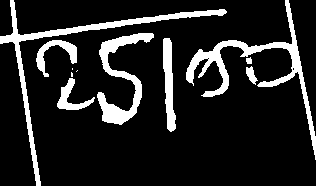

detected_lines


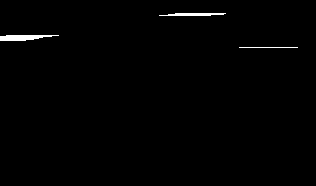

image


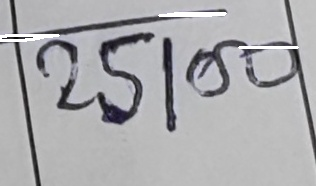

result


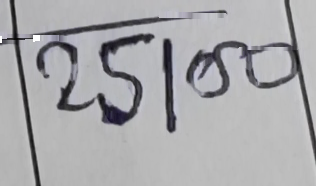

-1

In [ ]:
import cv2

image = cv2.imread('/content/handwritten_long_numbers_recognition/img/webcam/IMG_20210820_122413.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

print('thresh')
cv2_imshow(thresh)
print('detected_lines')
cv2_imshow(detected_lines)
print('image')
cv2_imshow(image)
print('result')
cv2_imshow(result)
cv2.waitKey(0)

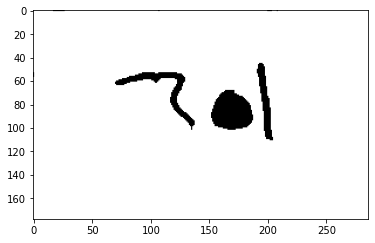

In [ ]:
image = r"/content/handwritten_long_numbers_recognition/img/webcam/IMG_20210820_122424.jpg"
model = "/content/handwritten_long_numbers_recognition/models/CNN-128b-60e-0.00001l-a.pth"
def is_contour_bad(c):
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 1 * peri, True)
    return not len(approx) == 4

read_img = cv2.imread(image)
# print(read_img)
gray = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 100)
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(read_img.shape[:2], dtype="uint8") * 255
for c in cnts:
    if is_contour_bad(c):
        cv2.drawContours(mask, [c], -1, 0, -1)
mask = cv2.dilate(mask, np.ones((2,2), np.uint8), iterations=2) 
# mask = cv2.dilate(mask, np.ones((3,3), np.uint8), iterations=1) 
mask = cv2.erode(mask, np.ones((1,1), np.uint8), iterations=3)
plt.imshow(mask, cmap='gray')

In [ ]:
from PIL import Image as im

In [ ]:
# !pip install Pillow==5.3.0

In [ ]:
data = im.fromarray(mask)
data.save('test.png')

In [ ]:
!python /content/handwritten_long_numbers_recognition/hlnr.py classify -a -f /content/test.png



Segmented image saved: /content/test-segmented.png
Boxed image saved: /content/test-boxed.png
Digits image saved: /content/test-digits.png



The recognized number is: 572




In [ ]:
!git clone https://github.com/GireeshS22/Handwriting-CNN-LSTM.git

Cloning into 'Handwriting-CNN-LSTM'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (50/50), done.


In [ ]:
!python /content/Handwriting-CNN-LSTM/cnn_lstm_model.py

2021-08-26 18:31:23.712921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/content/Handwriting-CNN-LSTM/cnn_lstm_model.py", line 9, in <module>
    from tensorflow import keras
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/__init__.py", line 48, in <module>
    from tensorflow.python import keras
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/__init__.py", line 27, in <module>
    from tensorflow.python.keras import models
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/models.py", line 27, in <module>
    from tensorflow.python.keras.engine import sequential
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py"

In [ ]:
!git clone https://github.com/0x454447415244/HandwritingRecognitionSystem.git

fatal: destination path 'HandwritingRecognitionSystem' already exists and is not an empty directory.


In [ ]:
%cd /content/HandwritingRecognitionSystem

/content/HandwritingRecognitionSystem


In [ ]:
!pip install -r /content/HandwritingRecognitionSystem/requirements.txt

In [ ]:
!pwd

/content/HandwritingRecognitionSystem


In [ ]:
!python /content/HandwritingRecognitionSystem/test.py

2021-08-26 18:35:15.211298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/content/HandwritingRecognitionSystem/test.py", line 10, in <module>
    import tensorflow.compat.v1 as tf
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/__init__.py", line 48, in <module>
    from tensorflow.python import keras
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/__init__.py", line 27, in <module>
    from tensorflow.python.keras import models
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/models.py", line 27, in <module>
    from tensorflow.python.keras.engine import sequential
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential